# Import Library

In [1]:
import pandas as pd 
import numpy as np

#plot Grafik
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("data_cleangojek.csv")

df

,userName,score,at,content,label,content_tokenize,content_normalized,content_stop_removed,content_Stemmed
0,Robbi Eko,5,2023-03-30 14:37:38,sip terima kasih,positif,"['sip', 'terima', 'kasih']","['sip', 'terima', 'kasih']","['sip', 'terima', 'kasih']","['sip', 'terima', 'kasih']"
1,mimi cedar,5,2023-03-30 14:35:59,bagaimana cara transfer sesama gopay gopay say...,positif,"['bagaimana', 'cara', 'transfer', 'sesama', 'g...","['bagaimana', 'cara', 'transfer', 'sesama', 'g...","['transfer', 'gopay', 'gopay', 'transfer', 'go...","['transfer', 'gopay', 'gopay', 'transfer', 'go..."
2,Elisabeth Kiswati Ladiyo,5,2023-03-30 14:33:41,amandan cepat sesuai dengan ekspektasi,positif,"['amandan', 'cepat', 'sesuai', 'dengan', 'eksp...","['amandan', 'cepat', 'sesuai', 'dengan', 'eksp...","['amandan', 'cepat', 'sesuai', 'ekspektasi']","['amandan', 'cepat', 'sesuai', 'ekspektasi']"
3,Jemmi Meliau ibanez,5,2023-03-30 14:23:25,aplikasi yang cukup membantu,positif,"['aplikasi', 'yang', 'cukup', 'membantu']","['aplikasi', 'yang', 'cukup', 'membantu']","['aplikasi', 'membantu']","['aplikasi', 'bantu']"
4,Boedi Arsih,5,2023-03-30 14:19:13,cepet sampainya,positif,"['cepet', 'sampainya']","['cepat', 'sampainya']","['cepat', 'sampainya']","['cepat', 'sampai']"
...,...,...,...,...,...,...,...,...,...
19150,NS P,5,2023-01-08 15:30:18,tolong di peringan app nya suka ngelag,positif,"['tolong', 'di', 'peringan', 'app', 'nya', 'su...","['tolong', 'di', 'peringan', 'app', 'nya', 'su...","['tolong', 'peringan', 'app', 'nya', 'suka', '...","['tolong', 'pering', 'app', 'nya', 'suka', 'ng..."
19151,EGA ARDANA,1,2023-01-08 15:29:57,gman nih gw mau upgrade gopay dh puluhan kali ...,negatif,"['gman', 'nih', 'gw', 'mau', 'upgrade', 'gopay...","['gman', 'nih', 'gue', 'mau', 'upgrade', 'gopa...","['gman', 'nih', 'gue', 'upgrade', 'gopay', 'de...","['gman', 'nih', 'gue', 'upgrade', 'gopay', 'de..."
19152,Andre Jayaramadhan,1,2023-01-08 15:27:11,perbaiki lagi apk nya mau to up gopay aja nung...,negatif,"['perbaiki', 'lagi', 'apk', 'nya', 'mau', 'to'...","['perbaiki', 'lagi', 'apk', 'nya', 'mau', 'tap...","['perbaiki', 'apk', 'nya', 'up', 'gopay', 'men...","['baik', 'apk', 'nya', 'up', 'gopay', 'tunggu'..."
19153,Angga Dian,5,2023-01-08 15:20:19,mantaap,positif,['mantaap'],['mantap'],['mantap'],['mantap']


In [3]:
df["label"].value_counts()

positif    12914
negatif     6241
Name: label, dtype: int64

# Oversampling

In [5]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['label']=="positif")] 
df_minority = df[(df['label']=="negatif")] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 12914, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [6]:
df_upsampled["label"].value_counts()

negatif    12914
positif    12914
Name: label, dtype: int64

# Transformation

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_stemmed = vectorizer.fit_transform(df['content_Stemmed'])
dense= tfidf_stemmed.toarray()

# Text Mining

## Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(dense, df['label'], test_size = 0.1, random_state= 42)

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train1,Y_train1)

# Evaluasi

In [9]:
from sklearn.metrics import confusion_matrix

evaluasi = gnb.predict(X_test1)
print(confusion_matrix(Y_test1, evaluasi))

[[ 243  378]
 [  55 1240]]


In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test1, evaluasi))

0.774008350730689


In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y_test1, evaluasi))

              precision    recall  f1-score   support

     negatif       0.82      0.39      0.53       621
     positif       0.77      0.96      0.85      1295

    accuracy                           0.77      1916
   macro avg       0.79      0.67      0.69      1916
weighted avg       0.78      0.77      0.75      1916



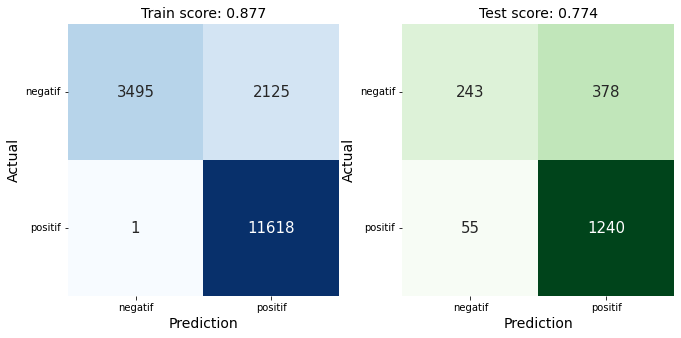

In [12]:
import matplotlib.pyplot as plt
from jcopml.plot import plot_confusion_matrix

plot_confusion_matrix(X_train1,Y_train1,X_test1,Y_test1,gnb)

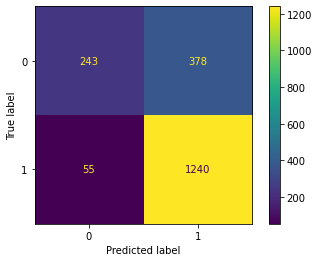

In [13]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test1, evaluasi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()